<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2/LS_DS9_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.maiormarso.com

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
cols = [   
   'party',
   'handicapped-infants',
   'water-project',
   'budget',
   'physician-fee-freeze',
   'el-salvador-aid',
   'religious-groups',
   'anti-satellite-ban',
   'aid-to-contras',
   'mx-missile',
   'immigration',
   'synfuels',
   'education',
   'right-to-sue',
   'crime',
   'duty_free',
   'south_Africa']
df = pd.read_csv('house-votes-84.data', names=cols)
df.head(1)


--2019-10-11 03:27:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.5’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-10-11 03:27:32 (125 KB/s) - ‘house-votes-84.data.5’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [2]:
import numpy as np
import pandas as pd
df=df.replace({'?': 'NaN', 'n':0.0, 'y':1.0,'republican':1,'democrat':0})
#df=df.replace({'?':np.NaN}maior)
df.head(8)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,1,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,0,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,0,0,1,0,1,1,1,0,0,0,0,0,0,NaN,1,1,1
7,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,NaN,1


In [3]:
df.index

RangeIndex(start=0, stop=435, step=1)

In [4]:
df.shape

(435, 17)

In [5]:
df.party.value_counts()

0    267
1    168
Name: party, dtype: int64

In [0]:
df = df.astype(float)

In [7]:
rep = df[df['party'] ==1]
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
rep = rep.astype(float)

In [0]:
# rep.sum(axis = 0, skipna = True) 

In [10]:
dem = df[df['party'] ==0]
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
2,0.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
dem = dem.astype(float)

In [0]:
# dem.sum(axis = 0, skipna = True) 

In [0]:
df = df.astype(float)

In [14]:
from scipy.stats import t
from scipy import stats
CI = t.interval(0.95,df['budget'])
a = df['budget'].dropna()
confidence_interval = t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
confidence_interval

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5241: RuntimeWarning: invalid value encountered in greater
  return df > 0


(0.5498151808536169, 0.6435810455614774)

In [15]:
budget_m = df['budget'].mean()
print(budget_m)

0.5966981132075472


In [16]:
mean_dem_budget = dem['budget'].mean()
print(mean_dem_budget)

0.8884615384615384


In [17]:
std_error_dem_budget = stats.sem(dem['budget'], nan_policy='omit')
print(std_error_dem_budget)

0.019560581385909926


In [18]:
t_stat_dem_budget = stats.ttest_1samp(dem['budget'], .5, nan_policy='omit')
print(t_stat_dem_budget)

Ttest_1sampResult(statistic=19.859406568628835, pvalue=5.75931504660857e-54)


In [19]:
t_stat_dem_budget[0]

19.859406568628835

In [20]:
CI_plus = mean_dem_budget + t_stat_dem_budget[0]*std_error_dem_budget
print(CI_plus)

1.2769230769230768


In [21]:
CI_minus = mean_dem_budget - t_stat_dem_budget[0]*std_error_dem_budget
print(CI_minus)

0.4999999999999999


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


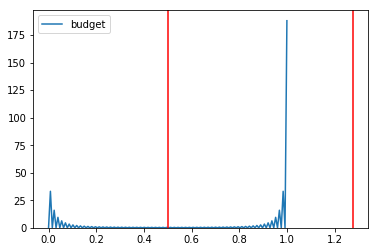

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(dem['budget'])
plt.axvline(x=CI_plus, color='red')
plt.axvline(x=CI_minus, color='red')

plt.show()


#3.1 what does it tell you about the data and its distribution?

1. My null Hypothosis is that they are voting evenly.
2. Alternative would also be voting even.
3. The confidence level is .95 
4. Using the mean for the sample mean, there is no bell and the mean line is standing vulnerable with the cutoff lines in an awkward position.

###See 3.2 below

In [23]:
confidence = 0.95
(1 + confidence) / 2.0  # This converts confidence to two-tailed

0.975

In [24]:
confidence_level = .95
dof = 431 - 1  

stats.t.ppf((1 + confidence_level) / 2, dof)

1.9654961915712994

In [0]:
original_sample=a

In [0]:
sample_means = []
for x in range(3000):
  m =   np.random.choice(original_sample,300).mean()
  sample_means.append(m) 
   



(0, 1)

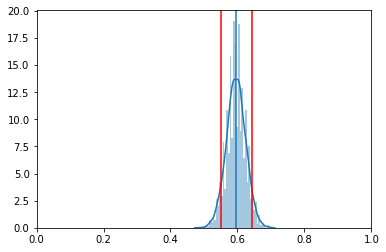

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sample_means)

plt.axvline(x=original_sample.mean())
plt.axvline(x=confidence_interval[0], color='r')
plt.axvline(x=confidence_interval[1], color='r')
plt.xlim(0, 1)

In [28]:
df['budget'].value_counts()

1.0    253
0.0    171
Name: budget, dtype: int64

#3.2 what does it tell you about the data and its distribution?

1. My null Hypothosis is that they are voting evenly.
2. Alternative would also be voting even.
3. The confidence level is .95 
4. Using 3000 for the sample mean, the bell stands straight up narrow towering tightly between the cutoff lines.

In [0]:
#m[0][1][1]
sample_means = []
for x in range(3000):
  m =   np.random.choice(original_sample,300).mean()
  sample_means.append(m)        

In [0]:
from scipy.stats import bayes_mvs
m=bayes_mvs(original_sample)

(0, 1)

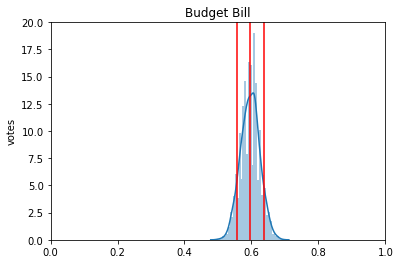

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.distplot(sample_means)

plt.axvline(x=m[0][0], color='r')
plt.axvline(x=m[0][1][0], color='r')
plt.axvline(x=m[0][1][1], color='r')
plt.title('Budget Bill')
plt.ylabel('votes')

plt.xlim(0, 1)


#dem['budget'].plot.hist();

In [0]:
df = df.astype(float)

In [33]:
demlist = dem["budget"].tolist()
demlist

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [34]:
print(*demlist, sep=",") 

1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,0.0,1.0,0.0,1.0,1.0,0.0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,nan,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,nan,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,nan,1.0,1.0,0.0,1.0,1.0,

In [35]:
replist = rep["budget"].tolist()
replist

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 1.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0

In [36]:
print(*replist, sep = ",") 

0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,1.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
ddf=df[['party','budget','crime']]
ddf

,party,budget,crime
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,1.0
5,0.0,1.0,1.0
6,0.0,0.0,1.0
7,1.0,0.0,1.0
8,1.0,0.0,1.0
9,0.0,1.0,0.0


In [38]:
import pandas as pd
dc=df[['party','budget','crime']]
ddf[['budget','crime']]

,budget,crime
0,0.0,1.0
1,0.0,1.0
2,1.0,1.0
3,1.0,0.0
4,1.0,1.0
5,1.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [39]:
contingency_table =  pd.crosstab(df['party'], df['budget'])
contingency_table

budget,0.0,1.0
party,,
0.0,29,231
1.0,142,22


In [0]:
e1 = (contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum()

In [0]:
e2 = (contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum()

In [0]:
e3 = (contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum()

In [0]:
e4 = (contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum()

In [44]:
contingency_table =  pd.crosstab(df['party'], df['budget'])
contingency_table

budget,0.0,1.0
party,,
0.0,29,231
1.0,142,22


In [45]:
((contingency_table[0.0][0.0]-(contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum() )**2) / ((contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum())

54.878823449528504

In [46]:
((contingency_table[1.0][0.0]-(contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum() )**2) / ((contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[0.0].sum())

37.09201110620308

In [47]:
((contingency_table[0.0][1.0]-(contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum() )**2) / ((contingency_table[0.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum())

87.00301278583787

In [48]:
((contingency_table[1.0][1.0]-(contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum() )**2) / ((contingency_table[1.0].sum()/contingency_table.sum().sum())*contingency_table.loc[1.0].sum())                #maior

58.80440785129753

In [49]:
54.878823449528504+37.09201110620308+87.00301278583787+58.80440785129753

237.778255192867

In [50]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 234.65408769323486
P-value: 5.759792112623893e-53
Degrees of Freedom: 1
Expected: 
 [[104.85849057 155.14150943]
 [ 66.14150943  97.85849057]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)